In [1]:
import os
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

# 定义一个函数用于从文件中读取复数并存储到列表中
def read_complex_numbers_from_file(file_path):
    complex_numbers = []
    with open(file_path, 'r') as file:
        lines = file.readlines()
        for i in range(0, len(lines), 2):
            real_part = float(lines[i].strip())
            imag_part = float(lines[i+1].strip())
            complex_numbers.append(complex(real_part, imag_part))
    return complex_numbers

# 文件夹路径
folder_path = 'data'

# 读取每个文件中的复数并存储到列表
data = []
complex_numbers_list = []
for i in range(48):
    file_name = f'data{i}.txt'
    file_path = os.path.join(folder_path, file_name)
    if os.path.exists(file_path):
        complex_numbers = read_complex_numbers_from_file(file_path)
        data.append(complex_numbers)
    #data.append(complex_numbers_list)
    complex_numbers_list = []

PSS_data = []
complex_numbers_list = []
for i in range(3):
    file_name = f'PSS{i}.txt'
    file_path = os.path.join(folder_path, file_name)
    if os.path.exists(file_path):
        complex_numbers_list = read_complex_numbers_from_file(file_path)
    PSS_data.append(complex_numbers_list)
    complex_numbers_list = []

In [2]:
def relevant_test(data_index,pss_index):
    max = 0
    ret_list = []
    for i in range(len(data[data_index])-len(PSS_data[pss_index])):
        ret = complex(0,0)
        for j in range(len(PSS_data[pss_index])):
            ret = ret + data[data_index][j+i] * PSS_data[pss_index][j].conjugate()
            ret_list.append(abs(ret))
        if(abs(ret)>max):
            position = i
            max = abs(ret)
    return max,position,ret_list

In [3]:
def get_power(complex_list):
    pow = 0
    for i in complex_list:
        pow += abs(i)
    return pow

pow_dict = {}
for i in range(47):
    pow_dict[i] = get_power(data[i])

sorted_items = sorted(pow_dict.items(), key=lambda x: x[1], reverse=True)
top_six_indices = [key for key, value in sorted_items[:6]]
print(sorted_items[:6])
print(top_six_indices)

[(18, 32494718.26498174), (6, 32213499.828282077), (12, 29874161.945742153), (0, 28854743.59357442), (19, 24422766.9609572), (7, 22930454.519809652)]
[18, 6, 12, 0, 19, 7]


In [4]:
'RUN TIME WARNING 3MIN'
result = {}
#计算
for pss_index in range(len(PSS_data)):
    print(f'PSS{pss_index}:')
    for data_index in top_six_indices:
        max,position,ret_list = relevant_test(data_index,pss_index)
        print(f'data{data_index}:',max,'position:',position)
        result[f'PSS{pss_index}-data{data_index}'] = [max,position,ret_list]

#排序
max_values = {}
for key, value in result.items():
    pss, data_num = key.split('-')
    if pss not in max_values or value[0] > max_values[pss][0]:
        max_values[pss] = (value[0], data_num)

# 输出结果
for pss, (max_val, data_num) in max_values.items():
    print(f"{pss} corresponds to {data_num}")


PSS0:
data18: 2736769.319212648 position: 200
data6: 2587698.1159075466 position: 3649
data12: 2211295.5482800757 position: 2384
data0: 2354982.467496568 position: 2499
data19: 2896821.6171136876 position: 7666
data7: 4404821.99681784 position: 7666
PSS1:
data18: 2944468.7753803576 position: 5112
data6: 2791073.9856428117 position: 12396
data12: 2210388.6731974557 position: 1830
data0: 2689117.126556547 position: 8625
data19: 2018986.4048239402 position: 8716
data7: 5189658.629410912 position: 12749
PSS2:
data18: 2642151.4408395593 position: 1478
data6: 2353013.527005401 position: 12089
data12: 2011171.594638562 position: 737
data0: 2449533.4856999386 position: 8586
data19: 2074767.249166656 position: 7771
data7: 3909197.808363807 position: 7328
PSS0 corresponds to data7
PSS1 corresponds to data7
PSS2 corresponds to data7


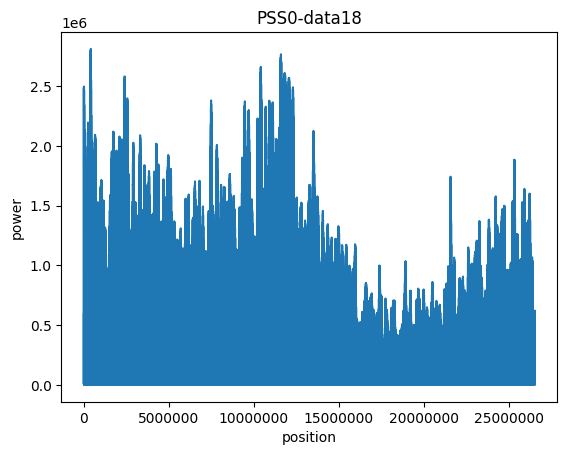

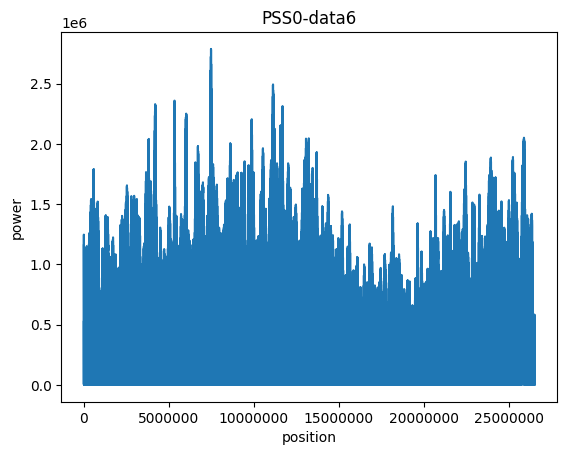

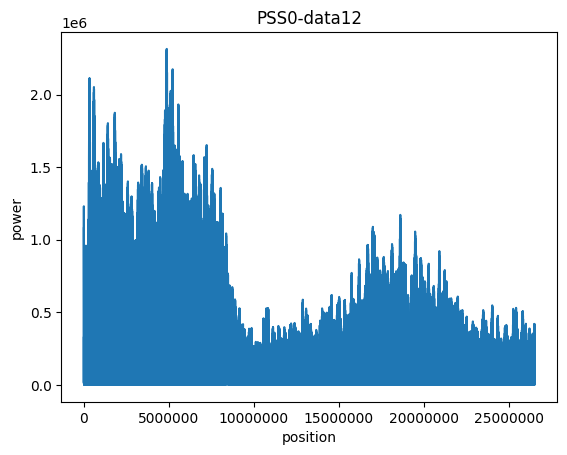

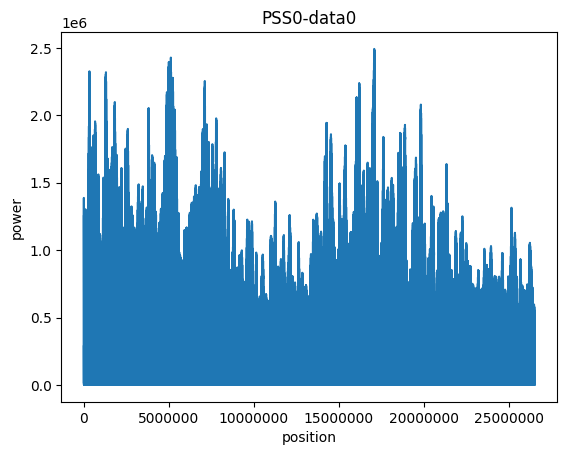

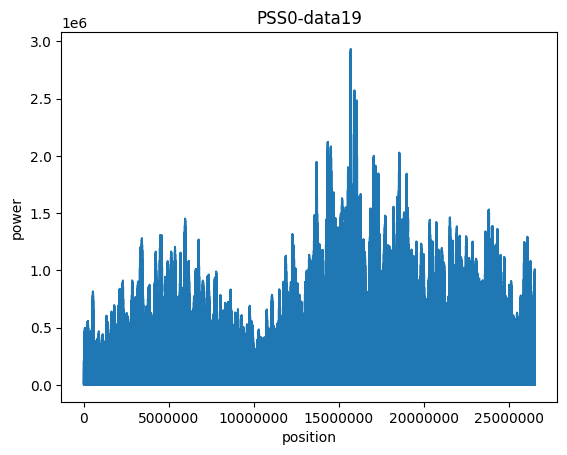

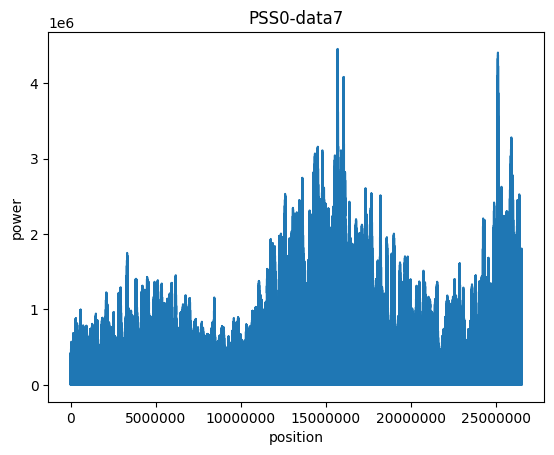

In [ ]:
# RUN TIME WARNING
pss_index = 0
for data_index in top_six_indices:
    list = result[f'PSS{pss_index}-data{data_index}'][2]
    x = np.arange(len(list))
    y = list
    plt.plot(x, y)
    plt.title(f'PSS{pss_index}-data{data_index}')
    plt.xlabel('position')
    plt.ylabel('power')
    plt.ticklabel_format(style='plain', axis='x')
    plt.show()

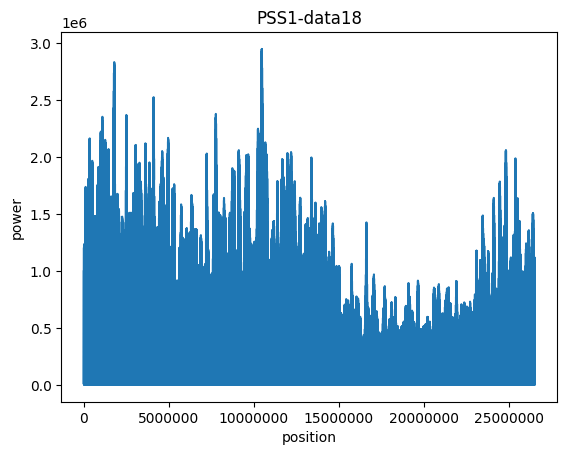

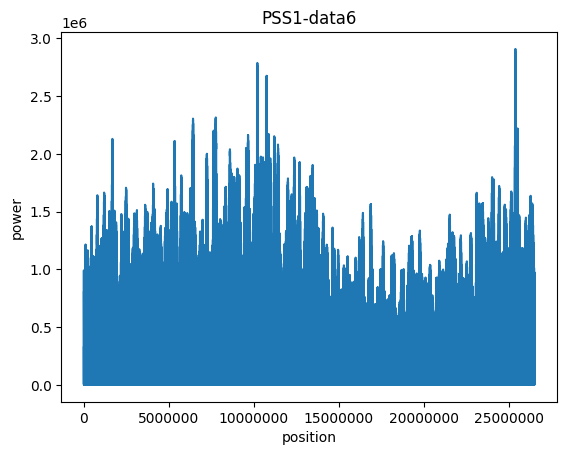

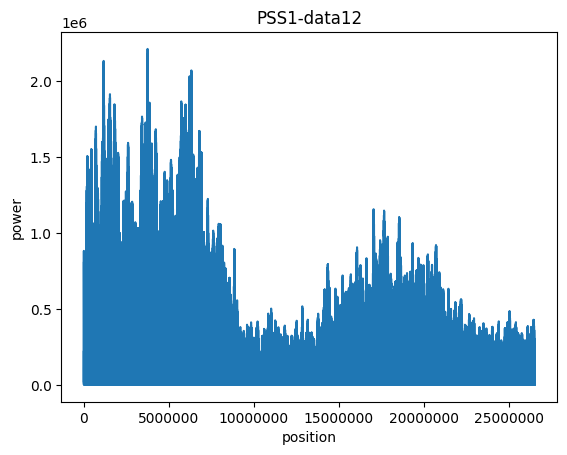

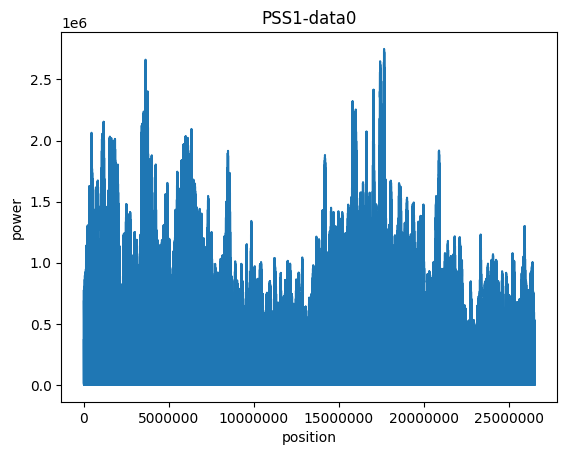

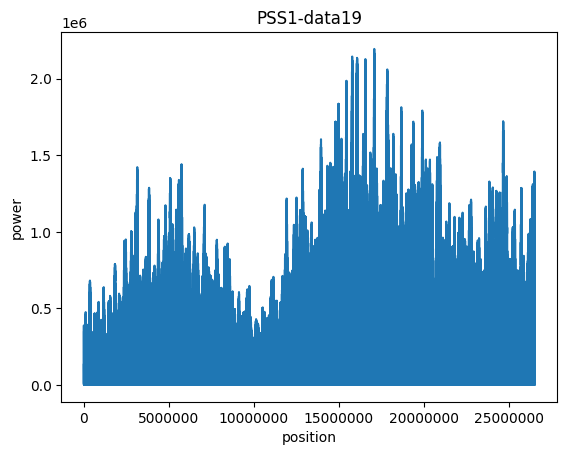

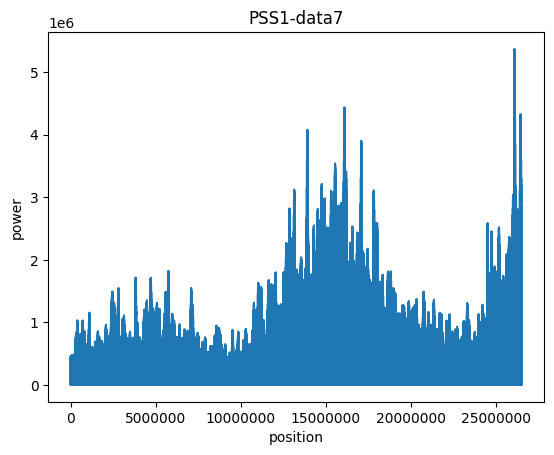

In [ ]:
pss_index = 1
for data_index in top_six_indices:
    list = result[f'PSS{pss_index}-data{data_index}'][2]
    x = np.arange(len(list))
    y = list
    plt.plot(x, y)
    plt.title(f'PSS{pss_index}-data{data_index}')
    plt.xlabel('position')
    plt.ylabel('power')
    plt.ticklabel_format(style='plain', axis='x')
    plt.show()

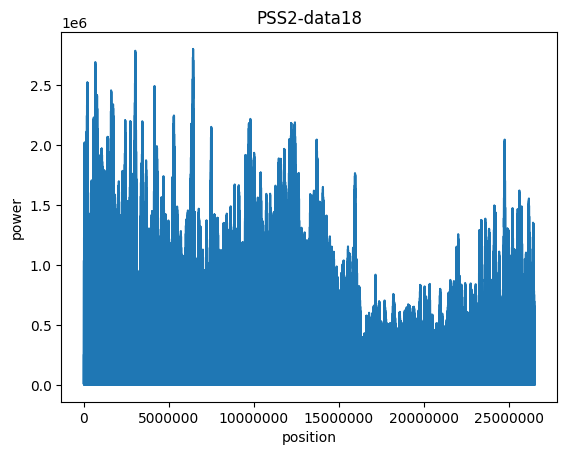

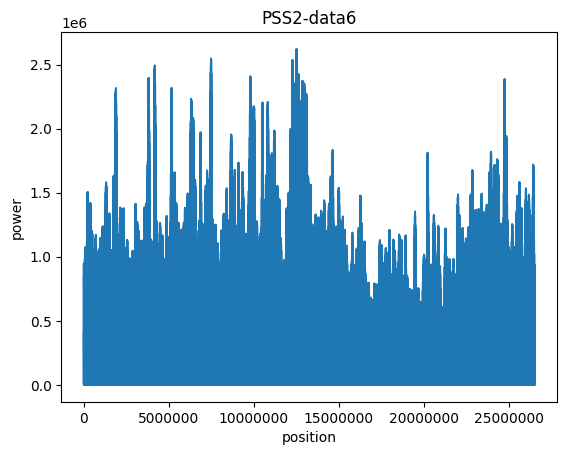

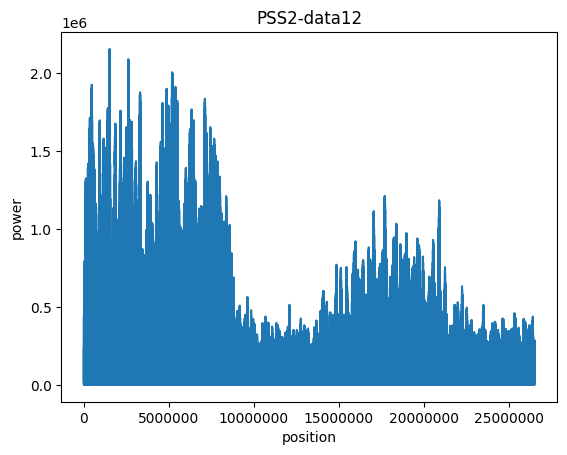

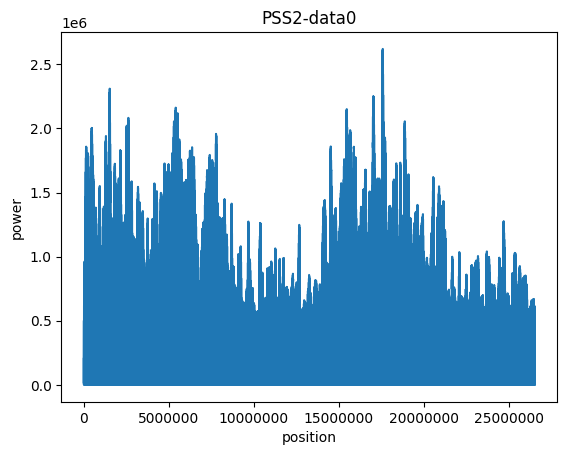

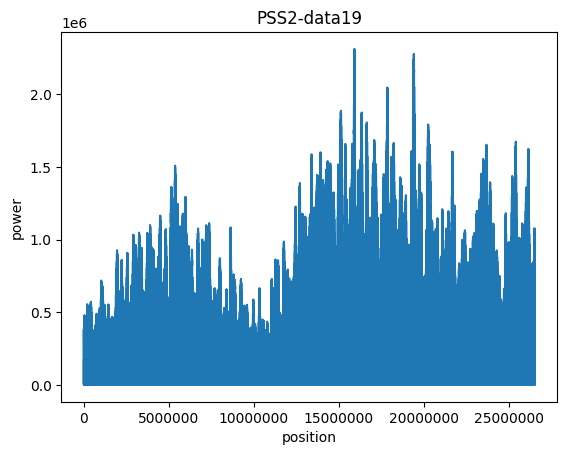

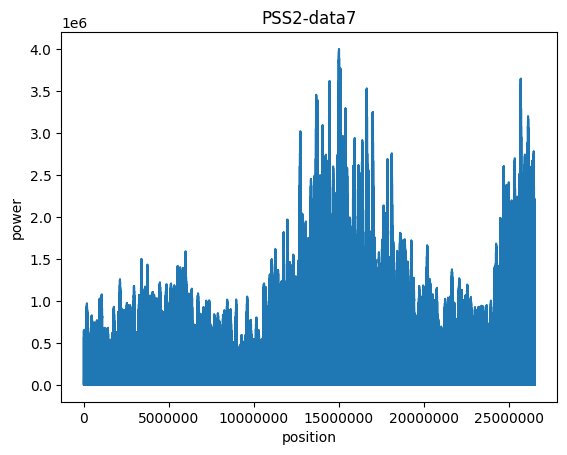

In [ ]:
pss_index = 2
for data_index in top_six_indices:
    list = result[f'PSS{pss_index}-data{data_index}'][2]
    x = np.arange(len(list))
    y = list
    plt.plot(x, y)
    plt.title(f'PSS{pss_index}-data{data_index}')
    plt.xlabel('position')
    plt.ylabel('power')
    plt.ticklabel_format(style='plain', axis='x')
    plt.show()